In [32]:
# rerun models with random state
# rerun gradient boost with tvec (slightly edit parameters)

# Modeling

## Imports

In [233]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

# core
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, \
                            GradientBoostingClassifier, StackingClassifier, VotingClassifier

## Model Preparation

In [2]:
# read in r/Seattle and r/SeattleWA data
sea = pd.read_csv('datasets/Cleaned_Seattle.csv')
sea_wa = pd.read_csv('datasets/Cleaned_SeattleWA.csv')

In [3]:
# combine r/Seattle and r/SeattleWA data into single DataFrame
all_posts = pd.concat([sea, sea_wa])

In [4]:
# convert Seattle to 0 and SeattleWA to 1 in subreddit column
all_posts['subreddit'] = all_posts['subreddit'].map({'Seattle': 0, 'SeattleWA': 1})

In [5]:
# create X (text) and y (subreddit)
X = all_posts['text']
y = all_posts['subreddit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

## Modeling with CountVectorizer
#### Logistic Regression

In [7]:
log_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

log_cvec_params = {
    'cvec__max_features': [7000, 7500],
    'cvec__max_df': [0.8, 0.825],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2), (1,3)],
    'lr__max_iter': [200]
}

log_cvec_gs = GridSearchCV(log_cvec_pipe,
                     param_grid = log_cvec_params)

log_cvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.8, 0.825],
                         'cvec__max_features': [7000, 7500],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': ['english'],
                         'lr__max_iter': [200]})

In [8]:
print(log_cvec_gs.best_params_)
print(log_cvec_gs.score(X_train, y_train))
print(log_cvec_gs.score(X_test, y_test))

{'cvec__max_df': 0.8, 'cvec__max_features': 7500, 'cvec__ngram_range': (1, 3), 'cvec__stop_words': 'english', 'lr__max_iter': 200}
0.98464025869038
0.5411954765751211


#### Bagging

In [9]:
bag_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('bag', BaggingClassifier())
])

bag_cvec_params = {
    'cvec__max_features': [7000, 7500],
    'cvec__max_df': [0.8, 0.825],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2), (1,3)],
    'bag__n_estimators': [7, 10, 15],
    'bag__max_features': [0.6, 0.8, 1],
    

}

bag_cvec_gs = GridSearchCV(bag_cvec_pipe,
                     param_grid = bag_cvec_params)

bag_cvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('bag', BaggingClassifier())]),
             param_grid={'bag__max_features': [0.6, 0.8, 1],
                         'bag__n_estimators': [7, 10, 15],
                         'cvec__max_df': [0.8, 0.825],
                         'cvec__max_features': [7000, 7500],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': ['english']})

In [10]:
print(bag_cvec_gs.best_params_)
print(bag_cvec_gs.score(X_train, y_train))
print(bag_cvec_gs.score(X_test, y_test))

{'bag__max_features': 0.8, 'bag__n_estimators': 10, 'cvec__max_df': 0.825, 'cvec__max_features': 7000, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english'}
0.9765561843168957
0.5290791599353797


#### Random Forest

In [12]:
rf_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_cvec_params = {
    'cvec__max_features': [7000, 7500],
    'cvec__max_df': [0.8, 0.85],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2), (1,3)],
    'rf__n_estimators': [150, 200],
    'rf__max_samples': [0.4, 0.6, 1],

}

rf_cvec_gs = GridSearchCV(rf_cvec_pipe,
                     param_grid = rf_cvec_params)

rf_cvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.8, 0.85],
                         'cvec__max_features': [7000, 7500],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': ['english'],
                         'rf__max_samples': [0.4, 0.6, 1],
                         'rf__n_estimators': [150, 200]})

In [13]:
print(rf_cvec_gs.best_params_)
print(rf_cvec_gs.score(X_train, y_train))
print(rf_cvec_gs.score(X_test, y_test))

{'cvec__max_df': 0.85, 'cvec__max_features': 7500, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'rf__max_samples': 0.6, 'rf__n_estimators': 200}
0.9935327405012127
0.5621970920840065


#### AdaBoost

In [14]:
ada_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ada', AdaBoostClassifier())
])

ada_cvec_params = {
    'cvec__max_features': [6500, 7000],
    'cvec__max_df': [0.8, 0.85],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2), (1,3)],
    'ada__n_estimators': [50, 75, 100],

}

ada_cvec_gs = GridSearchCV(ada_cvec_pipe,
                     param_grid = ada_cvec_params)

ada_cvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__n_estimators': [50, 75, 100],
                         'cvec__max_df': [0.8, 0.85],
                         'cvec__max_features': [6500, 7000],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': ['english']})

In [15]:
print(ada_cvec_gs.best_params_)
print(ada_cvec_gs.score(X_train, y_train))
print(ada_cvec_gs.score(X_test, y_test))

{'ada__n_estimators': 75, 'cvec__max_df': 0.8, 'cvec__max_features': 6500, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english'}
0.646456480732956
0.5395799676898223


#### Gradient Boosting

In [16]:
gb_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('gb', GradientBoostingClassifier())
])

gb_cvec_params = {
    'cvec__max_features': [7000, 7500],
    'cvec__max_df': [0.8, 0.85],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2), (1,3)],
    'gb__n_estimators': [100, 150],
    'gb__subsample': [0.5, 0.6, 0.7],
    'gb__max_depth': [4, 5]

}

gb_cvec_gs = GridSearchCV(gb_cvec_pipe,
                     param_grid = gb_cvec_params)

gb_cvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'cvec__max_df': [0.8, 0.85],
                         'cvec__max_features': [7000, 7500],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': ['english'],
                         'gb__max_depth': [4, 5],
                         'gb__n_estimators': [100, 150],
                         'gb__subsample': [0.5, 0.6, 0.7]})

In [17]:
print(gb_cvec_gs.best_params_)
print(gb_cvec_gs.score(X_train, y_train))
print(gb_cvec_gs.score(X_test, y_test))

{'cvec__max_df': 0.8, 'cvec__max_features': 7500, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'gb__max_depth': 5, 'gb__n_estimators': 150, 'gb__subsample': 0.5}
0.841552142279709
0.537156704361874


#### Multinomial Naive Bayes

In [18]:
nb_cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

nb_cvec_params = {
    'cvec__max_features': [7000, 7500],
    'cvec__max_df': [0.825, 0.85],
    'cvec__stop_words': ['english'],
    'cvec__ngram_range': [(1,2), (1,3)],
}

nb_cvec_gs = GridSearchCV(nb_cvec_pipe,
                     param_grid = nb_cvec_params)

nb_cvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.825, 0.85],
                         'cvec__max_features': [7000, 7500],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': ['english']})

In [19]:
print(nb_cvec_gs.best_params_)
print(nb_cvec_gs.score(X_train, y_train))
print(nb_cvec_gs.score(X_test, y_test))

{'cvec__max_df': 0.825, 'cvec__max_features': 7000, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english'}
0.8264618701158717
0.555735056542811


## Tfidf Vectorizer

#### Logistic Regression

In [20]:
log_tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

log_tvec_params = {
    'tvec__max_features': [7000, 7500],
    'tvec__max_df': [0.8, 0.85],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,2), (1,3)],
    'lr__max_iter': [100, 200]
}

log_tvec_gs = GridSearchCV(log_tvec_pipe,
                     param_grid = log_tvec_params)

log_tvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__max_iter': [100, 200],
                         'tvec__max_df': [0.8, 0.85],
                         'tvec__max_features': [7000, 7500],
                         'tvec__ngram_range': [(1, 2), (1, 3)],
                         'tvec__stop_words': ['english']})

In [21]:
print(log_tvec_gs.best_params_)
print(log_tvec_gs.score(X_train, y_train))
print(log_tvec_gs.score(X_test, y_test))

{'lr__max_iter': 100, 'tvec__max_df': 0.8, 'tvec__max_features': 7000, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.8563729452977634
0.5662358642972536


#### Bagging

In [22]:
bag_tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('bag', BaggingClassifier())
])

bag_tvec_params = {
    'tvec__max_features': [7000, 7500],
    'tvec__max_df': [0.8, 0.85],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,2), (1,3)],
    'bag__n_estimators': [7, 10, 15],
    'bag__max_features': [0.7, 0.8],
}

bag_tvec_gs = GridSearchCV(bag_tvec_pipe,
                     param_grid = bag_tvec_params)

bag_tvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('bag', BaggingClassifier())]),
             param_grid={'bag__max_features': [0.7, 0.8],
                         'bag__n_estimators': [7, 10, 15],
                         'tvec__max_df': [0.8, 0.85],
                         'tvec__max_features': [7000, 7500],
                         'tvec__ngram_range': [(1, 2), (1, 3)],
                         'tvec__stop_words': ['english']})

In [23]:
print(bag_tvec_gs.best_params_)
print(bag_tvec_gs.score(X_train, y_train))
print(bag_tvec_gs.score(X_test, y_test))

{'bag__max_features': 0.8, 'bag__n_estimators': 10, 'tvec__max_df': 0.8, 'tvec__max_features': 7500, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.9757477768795473
0.5444264943457189


#### Random Forest

In [24]:
rf_tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_tvec_params = {
    'tvec__max_features': [7000, 7500],
    'tvec__max_df': [0.825, 0.85],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,2), (1,3)],
    'rf__n_estimators': [150, 200],
    'rf__max_samples': [0.4, 0.5],
}

rf_tvec_gs = GridSearchCV(rf_tvec_pipe,
                     param_grid = rf_tvec_params)

rf_tvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_samples': [0.4, 0.5],
                         'rf__n_estimators': [150, 200],
                         'tvec__max_df': [0.825, 0.85],
                         'tvec__max_features': [7000, 7500],
                         'tvec__ngram_range': [(1, 2), (1, 3)],
                         'tvec__stop_words': ['english']})

In [25]:
print(rf_tvec_gs.best_params_)
print(rf_tvec_gs.score(X_train, y_train))
print(rf_tvec_gs.score(X_test, y_test))

{'rf__max_samples': 0.4, 'rf__n_estimators': 200, 'tvec__max_df': 0.825, 'tvec__max_features': 7000, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.9822150363783346
0.5573505654281099


#### AdaBoost

In [26]:
ada_tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('ada', AdaBoostClassifier())
])

ada_tvec_params = {
    'tvec__max_features': [7000, 7500],
    'tvec__max_df': [0.8, 0.825],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,2), (1,3)],
    'ada__n_estimators': [100, 125]
}

ada_tvec_gs = GridSearchCV(ada_tvec_pipe,
                     param_grid = ada_tvec_params)

ada_tvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__n_estimators': [100, 125],
                         'tvec__max_df': [0.8, 0.825],
                         'tvec__max_features': [7000, 7500],
                         'tvec__ngram_range': [(1, 2), (1, 3)],
                         'tvec__stop_words': ['english']})

In [27]:
print(ada_tvec_gs.best_params_)
print(ada_tvec_gs.score(X_train, y_train))
print(ada_tvec_gs.score(X_test, y_test))

{'ada__n_estimators': 125, 'tvec__max_df': 0.8, 'tvec__max_features': 7000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
0.7178658043654002
0.5460420032310178


#### Gradient Boosting

In [28]:
gb_tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('gb', GradientBoostingClassifier())
])

gb_tvec_params = {
    'tvec__max_features': [7000, 7500],
    'tvec__max_df': [0.8, 0.85],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,2), (1,3)],
    'gb__n_estimators': [100, 125],
    'gb__subsample': [0.3, 0.4],
    'gb__max_depth': [5, 6]
}

gb_tvec_gs = GridSearchCV(gb_tvec_pipe,
                     param_grid = gb_tvec_params)

gb_tvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'gb__max_depth': [5, 6],
                         'gb__n_estimators': [100, 125],
                         'gb__subsample': [0.3, 0.4],
                         'tvec__max_df': [0.8, 0.85],
                         'tvec__max_features': [7000, 7500],
                         'tvec__ngram_range': [(1, 2), (1, 3)],
                         'tvec__stop_words': ['english']})

In [29]:
print(gb_tvec_gs.best_params_)
print(gb_tvec_gs.score(X_train, y_train))
print(gb_tvec_gs.score(X_test, y_test))

{'gb__max_depth': 6, 'gb__n_estimators': 100, 'gb__subsample': 0.4, 'tvec__max_df': 0.8, 'tvec__max_features': 7000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
0.8485583400700619
0.531502423263328


#### Multinomial Naive Bayes

In [30]:
nb_tvec_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

nb_tvec_params = {
    'tvec__max_features': [7250, 7500, 7750],
    'tvec__max_df': [0.8, 0.825, 0.85,],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,2), (1,3)],
}

nb_tvec_gs = GridSearchCV(nb_tvec_pipe,
                     param_grid = nb_tvec_params)

nb_tvec_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.8, 0.825, 0.85],
                         'tvec__max_features': [7250, 7500, 7750],
                         'tvec__ngram_range': [(1, 2), (1, 3)],
                         'tvec__stop_words': ['english']})

In [31]:
print(nb_tvec_gs.best_params_)
print(nb_tvec_gs.score(X_train, y_train))
print(nb_tvec_gs.score(X_test, y_test))

{'tvec__max_df': 0.8, 'tvec__max_features': 7750, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
0.8609539207760711
0.574313408723748


## Voting Classifier

In [39]:
# names for pipes for VotingClassifier
pipe_names = ['logc', 'bagc', 'rfc', 'adac', 'gbc', 'nbc',
             'logt', 'bagt', 'rft', 'adat', 'gbt', 'nbt']

# pipes for VotingClassifier
pipes = [log_cvec_pipe, bag_cvec_pipe, rf_cvec_pipe, ada_cvec_pipe, gb_cvec_pipe, nb_cvec_pipe,
         log_tvec_pipe, bag_tvec_pipe, rf_tvec_pipe, ada_tvec_pipe, gb_tvec_pipe, nb_tvec_pipe]

# pregridsearched models with hyperparameters tuned
tuned_models = [log_cvec_gs, bag_cvec_gs, rf_cvec_gs, ada_cvec_gs, gb_cvec_gs, nb_cvec_gs,
                log_tvec_gs, bag_tvec_gs, rf_tvec_gs, ada_tvec_gs, gb_tvec_gs, nb_tvec_gs]

In [40]:
# aliases and pipes for voting classifers
pipe_tuples = list(zip(pipe_names, pipes))
voters = VotingClassifier(pipe_tuples)

# voting model paramters
voter_params = {}

# collect hyperparameters from gridsearch fits for voting classifier
for i, model in enumerate(tuned_models):
    for param_name, param_val in model.best_params_.items():
        # make sure hyperparameter names are of the form
        # (pipe name)__(transformer or estimatorname)__(parameter name)
        voter_param_name = pipe_names[i] + '__' + param_name
        voter_params[voter_param_name] = [param_val]

In [41]:
# fit voting classifier over best found parameters
vote_gs = GridSearchCV(voters, param_grid = voter_params)
vote_gs.fit(X_train, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('logc',
                                                     Pipeline(steps=[('cvec',
                                                                      CountVectorizer()),
                                                                     ('lr',
                                                                      LogisticRegression())])),
                                                    ('bagc',
                                                     Pipeline(steps=[('cvec',
                                                                      CountVectorizer()),
                                                                     ('bag',
                                                                      BaggingClassifier())])),
                                                    ('rfc',
                                                     Pipeline(steps=[('cvec',
                                                            

In [42]:
print(vote_gs.score(X_train, y_train))
print(vote_gs.score(X_test, y_test))

0.9630827270277553
0.5702746365105008


## Stacking

In [44]:
# pipe_tuples are already in the form for stacking
# due to setup for VotingClassifier
stack = StackingClassifier(estimators = pipe_tuples,
                                 final_estimator = LogisticRegression())

stack.fit(X_train, y_train)

C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\John\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

StackingClassifier(estimators=[('logc',
                                Pipeline(steps=[('cvec', CountVectorizer()),
                                                ('lr', LogisticRegression())])),
                               ('bagc',
                                Pipeline(steps=[('cvec', CountVectorizer()),
                                                ('bag', BaggingClassifier())])),
                               ('rfc',
                                Pipeline(steps=[('cvec', CountVectorizer()),
                                                ('rf',
                                                 RandomForestClassifier())])),
                               ('adac',
                                Pipeline(steps=[('cvec', CountVectorizer()),
                                                ('ada',
                                                 AdaBoostClas...
                                Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       

In [45]:
print(stack.score(X_train, y_train))
print(stack.score(X_test, y_test))

0.9841013203988144
0.5807754442649434


In [162]:
# summative bar chart on model performances
model_names = ['Log', 'Bag', 'R Forest', 'Ada', 'Gradient', 'Mult NB', 'Vote', 'Stacking']

# tune models are log, bag, rf, ada, grad boost, naive bayes
# first six models with countvectorizer, then with tfidfvectorizer
all_models = tuned_models + [vote_gs, stack]

# accuracy scores for each classification model
model_scores = [model.score(X_test, y_test) for model in all_models]

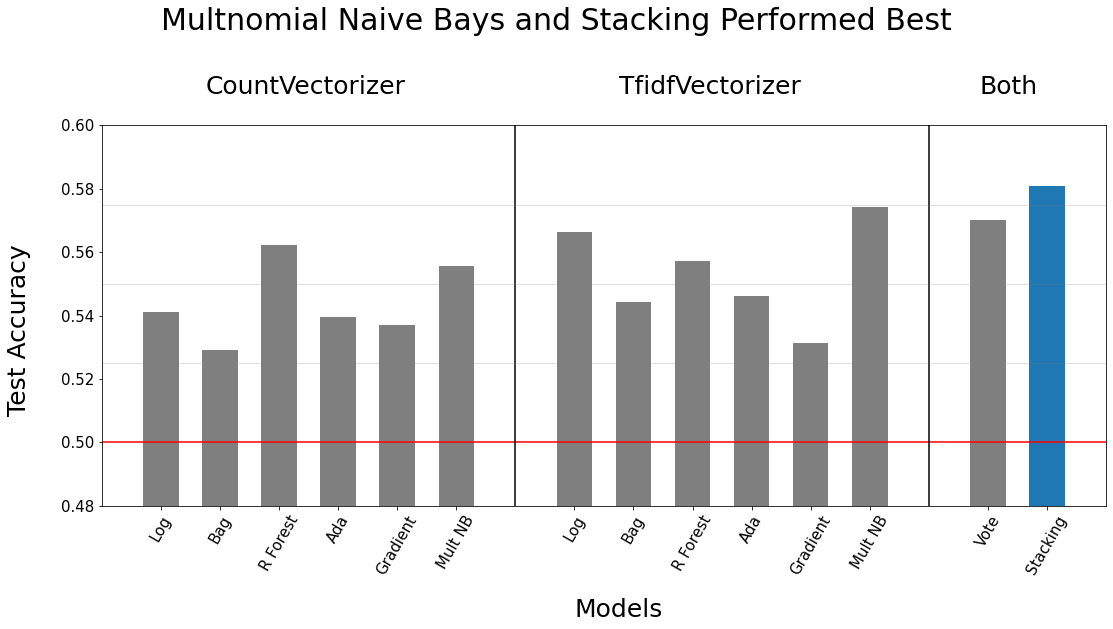

In [232]:
plt.figure(figsize = (18,7))

# plot title
plt.text(s = 'Multnomial Naive Bays and Stacking Performed Best', size = 30, x = 1, y = 0.63)

# generate x position of bars and 
# create model names as x labels for bars
x_vals = list(range(1,7)) + list(range(8,14)) + [15,16]
x_labels = 2*model_names[:6] + model_names[-2:]
plt.xticks(x_vals, labels = x_labels, rotation = 60, size = 15)
plt.yticks(size = 15)

# plot the bars
plt.bar(x_vals, model_scores, width = 0.6, color = 'tab:grey')

# shape axes and create axes labels
plt.xlim([0,17])
plt.ylim([0.48,0.6])
plt.text(s = 'Models', size = 25, x= 8, y = 0.445)
plt.text(s = 'Test Accuracy', size = 25, rotation = 90, x = -1.6, y = 0.51);

# baseline accuracy
plt.axhline(0.5, color = 'red')

# plot subdivisions
plt.axvline(7, color = 'black')
plt.axvline(14, color = 'black')

# subdivision titles
plt.text(s = 'CountVectorizer', size = 25, x= 1.75, y = 0.61)
plt.text(s = 'TfidfVectorizer', size = 25, x= 8.75, y = 0.61)
plt.text(s = 'Both', size = 25, x= 14.85, y = 0.61)


# highlight production model
plt.bar(16, model_scores[-1], width = 0.6, color = 'tab:blue')

# highlight runneru-ups
#runner_ups = [model_scores[i] for i in [2,6,11,12]]
#plt.bar([3,8,13,15], runner_ups, width = 0.6, color = 'tab:blue', alpha = 0.3)


# grid
plt.axhline(0.525, color = 'gray', alpha = 0.5, linewidth = 0.5)
plt.axhline(0.55, color = 'gray', alpha = 0.5, linewidth = 0.5)
plt.axhline(0.575, color = 'gray', alpha = 0.5, linewidth = 0.5);

#plt.tight_layout()
plt.savefig('images/iteration_scores.png');

## Modeling On Non Text Data

In [46]:
# nt for Non Text
X_nt = all_posts[['created_utc', 'sent_pos', 'sent_neg', 'sent_compound', 'word_count']]
y_nt = all_posts['subreddit']

In [47]:
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_nt, y_nt, random_state = 42, stratify = y_nt)

In [48]:
lr = LogisticRegression()
lr.fit(X_train_nt, y_train_nt)

LogisticRegression()

In [49]:
print(lr.score(X_train_nt, y_train_nt))
print(lr.score(X_test_nt, y_test_nt))

0.5036378334680679
0.5032310177705978


In [50]:
rf = RandomForestClassifier()
rf.fit(X_train_nt, y_train_nt)

RandomForestClassifier()

In [51]:
pd.Series(rf.feature_importances_, index = X_nt.columns)

created_utc      0.652604
sent_pos         0.087139
sent_neg         0.061961
sent_compound    0.097087
word_count       0.101208
dtype: float64

Impressive!

Suspiciously, the model's success is coming from `created_utc`. It may be the case that when we pulled our data, we had to dig deeper into one subreddit. If this is the case, the model is simply noticing information about how the data was scraped.

Let us convert our UTC time to a datetime and reimplement the model using the time of day in which the post was created. If the model remains successful, this will be a great thing to notice. If not, it will be nice to rule it out.

In [52]:
all_posts['post_hour'] = pd.to_datetime(all_posts['created_utc'], unit = 's').apply(lambda x: x.time().hour)

In [53]:
X_nt = all_posts[['post_hour', 'sent_pos', 'sent_neg', 'sent_compound', 'word_count']]
y_nt = all_posts['subreddit']

In [54]:
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_nt, y_nt, random_state = 42, stratify = y_nt)

In [55]:
lr = LogisticRegression()
lr.fit(X_train_nt, y_train_nt)

LogisticRegression()

In [56]:
print(lr.score(X_train_nt, y_train_nt))
print(lr.score(X_test_nt, y_test_nt))

0.535704661816222
0.5331179321486268


In [57]:
rf = RandomForestClassifier()
rf.fit(X_train_nt, y_train_nt)

RandomForestClassifier()

In [58]:
print(rf.score(X_train_nt, y_train_nt))
print(rf.score(X_test_nt, y_test_nt))

0.9897601724602533
0.5218093699515347


In [59]:
pd.Series(rf.feature_importances_, index = X_nt.columns)

post_hour        0.159657
sent_pos         0.207078
sent_neg         0.144483
sent_compound    0.240390
word_count       0.248393
dtype: float64

In [234]:
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [5,10,15]
}

knn_gs = GridSearchCV(knn_pipe, param_grid = knn_params)

knn_gs.fit(X_train_nt, y_train_nt)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [5, 10, 15]})

In [235]:
print(knn_gs.score(X_train_nt, y_train_nt))
print(knn_gs.score(X_test_nt, y_test_nt))

0.6108865534896254
0.5282714054927302


After a few basic attempts to model the non text data, the scores do not seem to be anything better than our lowest performing text based models.